
# <span style="color:crimson">Milestone 1</span>

### <span style="color:#FFA500">Data Collection</span>

- **Data Source:** Kaggle â€“ [Cardiovascular Disease Dataset](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset)

### Information Gained:
- **Columns Overview:**
  - `age`: Age in days  
  - `gender`: 1 = female, 2 = male  
  - `height`: Height in cm  
  - `weight`: Weight in kg  
  - `ap_hi`: Systolic blood pressure  
  - `ap_lo`: Diastolic blood pressure  
  - `cholesterol`: 1 = normal, 2 = above normal, 3 = well above normal  
  - `gluc`: 1 = normal, 2 = above normal, 3 = well above normal  
  - `smoke`: 0 = non-smoker, 1 = smoker  
  - `alco`: 0 = no alcohol intake, 1 = consumes alcohol  
  - `active`: 0 = not physically active, 1 = active  
  - `cardio`: Target variable (0 = no disease, 1 = has disease)  

- The dataset contains 70,000 patient records with 12 predictive features and 1 target variable (cardio), making it large enough for training machine learning models.
- Features include **Patient characteristics** (age, gender, height, weight), **clinical measurements** (blood pressure, cholesterol, glucose), and **lifestyle indicators** (smoking, alcohol intake, physical activity).  
- This dataset is highly relevant for predictive modeling as it captures **major risk factors** for cardiovascular disease.
- Age is stored in days.  
- The dataset includes an id column, which is just a technical index and not useful for modeling. This will be dropped during preprocessing.

## <span style="color:#FFA500">Data Exploration (EDA)</span>

## Reading the data from a CSV file into a DataFrame using pandas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('cardio_train.csv', sep= ';' )
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## Checking for NULL values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


## Checking for duplicates

In [4]:
df.duplicated().sum()

np.int64(0)

### key findings
- All columns are numeric.

- No missing values detected.

- No duplicates found

In [5]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## The values in Height , Weight , ap_hi and ap_lo these values need to be investigated further
#### 1) Height column
- ##### MIN value 55 cm 
- ##### MAX value 250 cm 

#### 2) Weight column
- ##### MIN value 10 kg
- ##### MAX value 200 kg

#### 3) ap_hi column (Systolic blood pressure)
- ##### Min value -150
- ##### MAX value 16020 

#### 4) ap_lo column (Diastolic blood pressure)
- ##### MIN value -70
- ##### MAX value 11000

### Judging by their min and max values we are sure that these columns need to be investigated for wrong entry or outliers

## Target Variable Balance

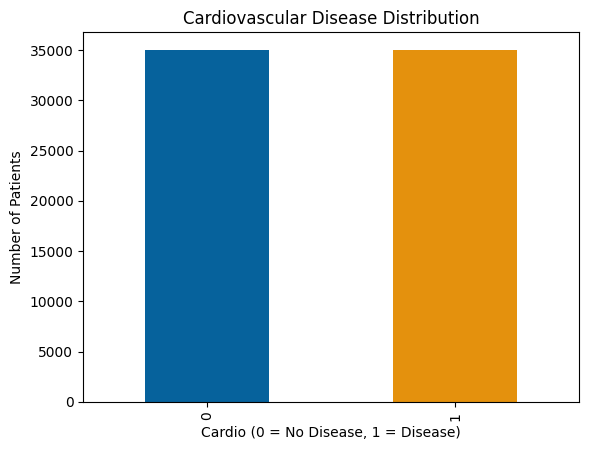

In [6]:
df['cardio'].value_counts().plot(kind="bar", color=["#06629C","#E4910D"])
plt.title("Cardiovascular Disease Distribution")
plt.xlabel("Cardio (0 = No Disease, 1 = Disease)")
plt.ylabel("Number of Patients")
plt.show()

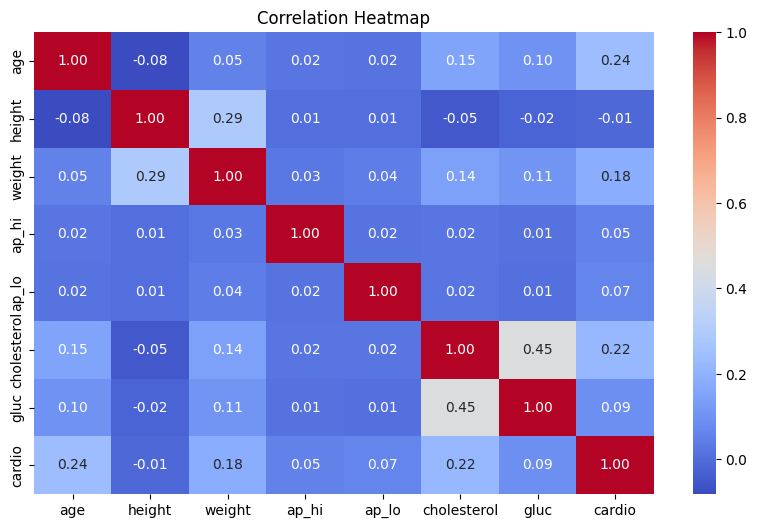

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['age','height','weight','ap_hi','ap_lo','cholesterol','gluc','cardio']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

- Strongest correlations with cardio: Age (0.24), Cholesterol (0.22), Weight (0.18).

- Weak but possible: Glucose (0.09), Blood Pressure (likely distorted by outliers).

- Least relevant: Height.

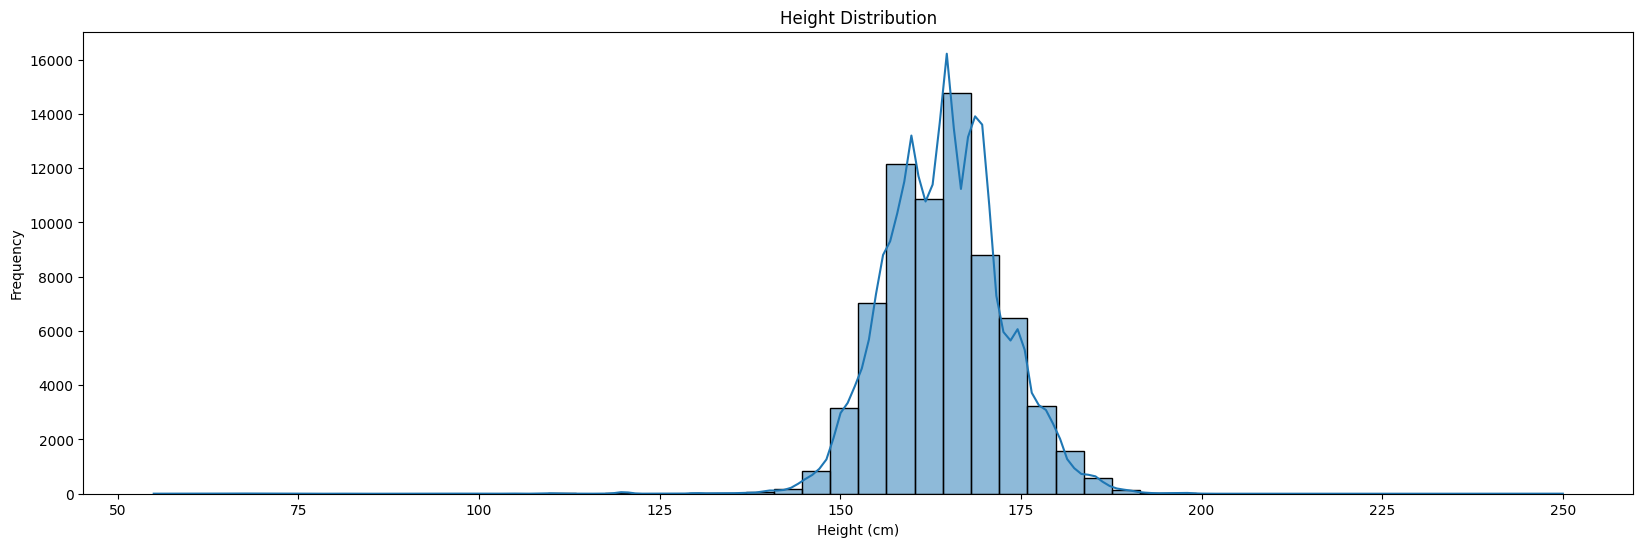

In [8]:
plt.figure(figsize=(20,6))
sns.histplot(df['height'], bins=50, kde=True)
plt.title("Height Distribution")
plt.xlabel("Height (cm)")
plt.ylabel("Frequency")
plt.show()

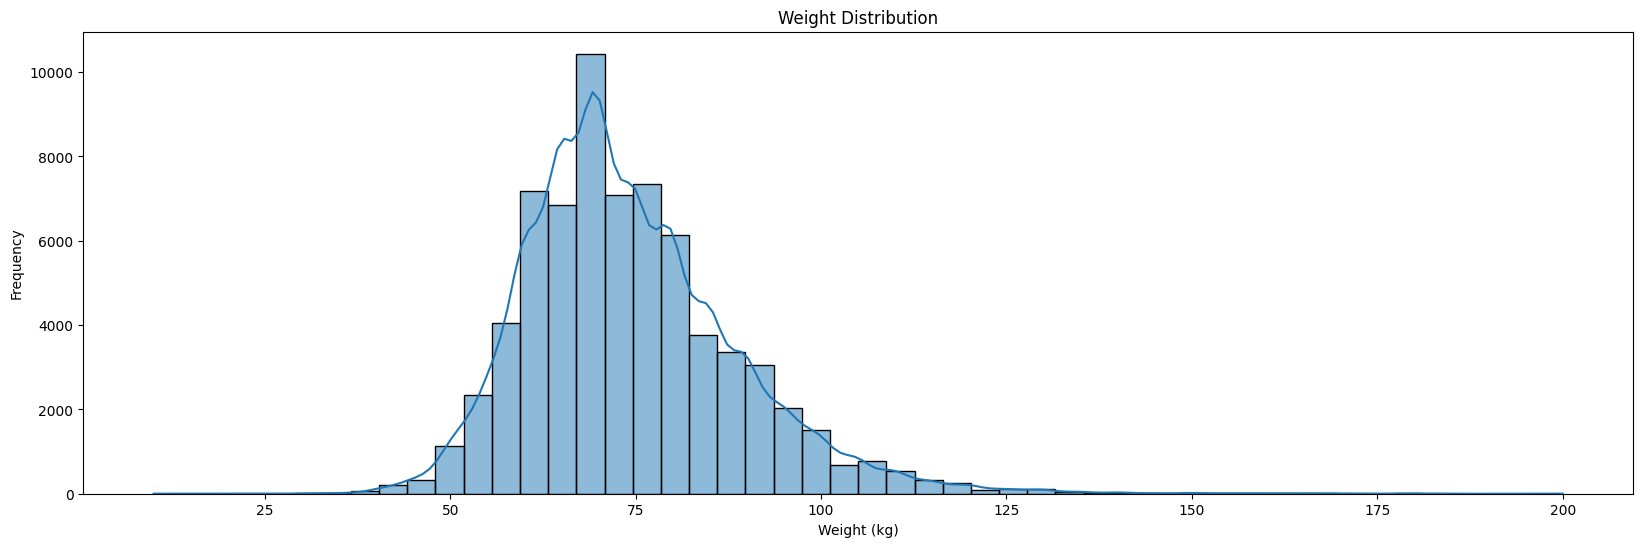

In [9]:
plt.figure(figsize=(20,6))
sns.histplot(df['weight'], bins=50, kde=True)
plt.title("Weight Distribution")
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")
plt.show()


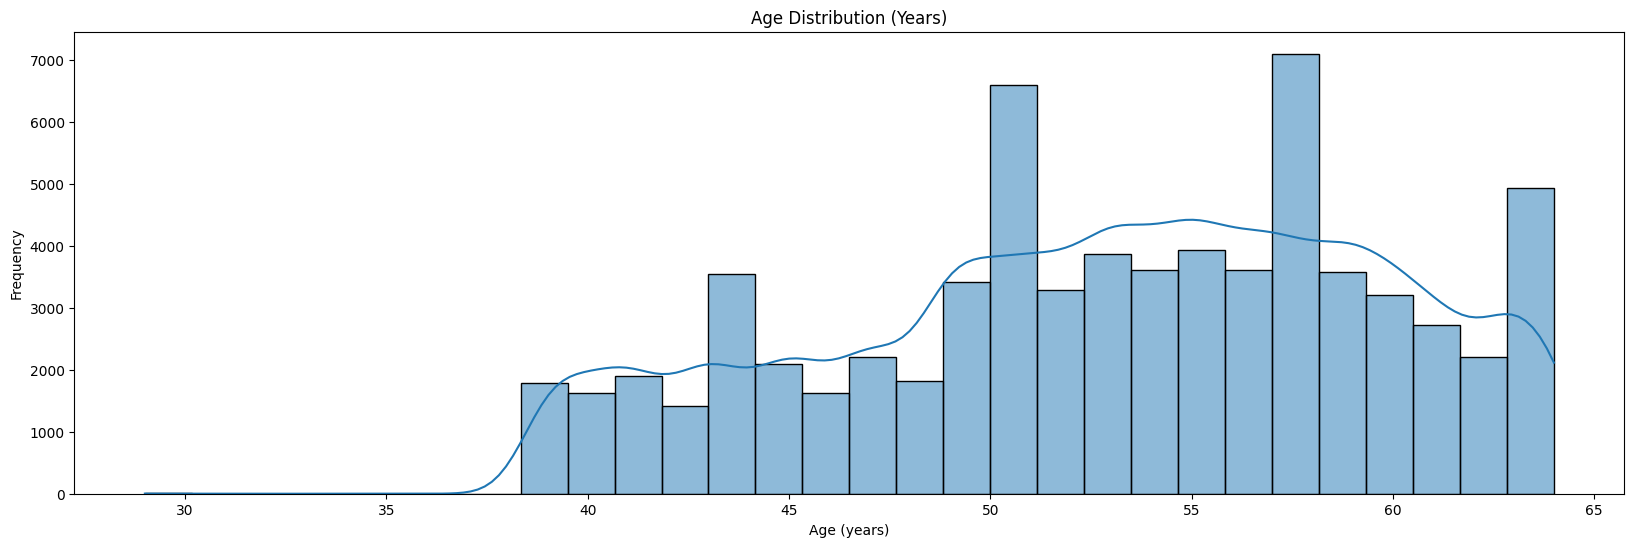

In [10]:
plt.figure(figsize=(20,6))
sns.histplot(df['age'] // 365, bins=30, kde=True)
plt.title("Age Distribution (Years)")
plt.xlabel("Age (years)")
plt.ylabel("Frequency")
plt.show()



<Axes: title={'center': '1 = Female   2 = Male'}, xlabel='gender'>

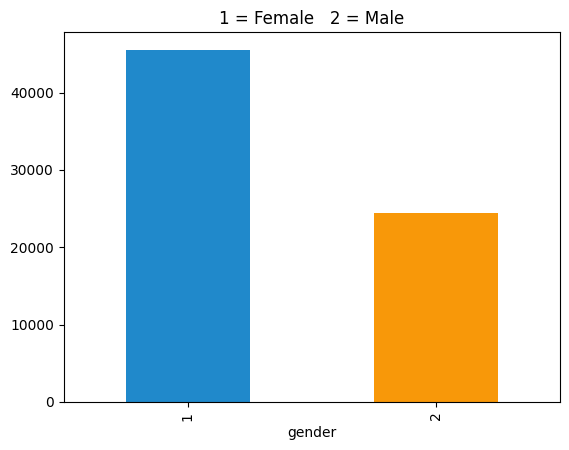

In [11]:
df['gender'].value_counts().plot(kind="bar", color=["#2089CB","#F89809"],title = '1 = Female   2 = Male')

<Axes: title={'center': '1 = Normal   2 = Above Normal   3 = Well Above Normal'}, xlabel='cholesterol'>

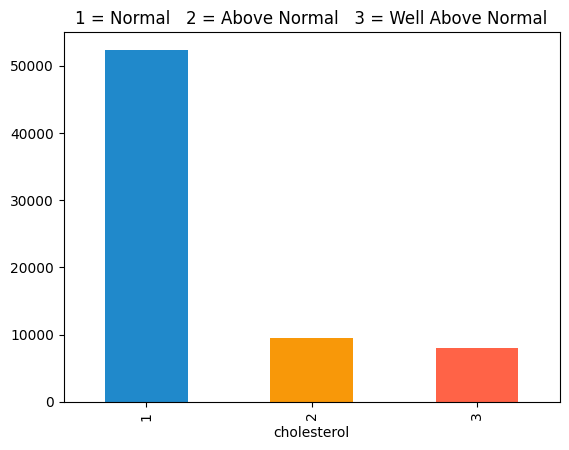

In [12]:
df['cholesterol'].value_counts().plot(kind="bar", color=["#2089CB","#F89809","#FF6347"],title = '1 = Normal   2 = Above Normal   3 = Well Above Normal')





<Axes: title={'center': '1 = Normal   2 = Above Normal   3 = Well Above Normal'}, xlabel='gluc'>

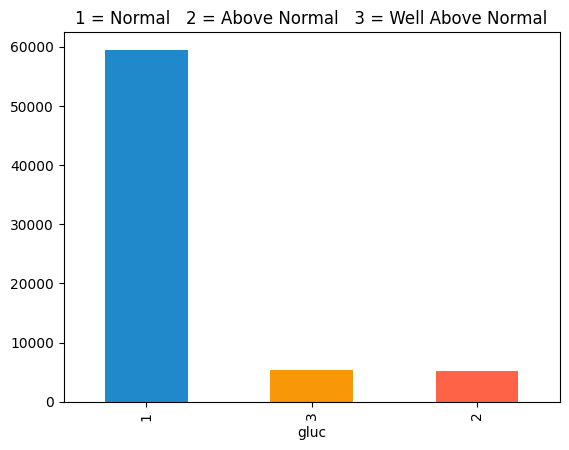

In [13]:
df['gluc'].value_counts().plot(kind="bar", color=["#2089CB","#F89809","#FF6347"],title = '1 = Normal   2 = Above Normal   3 = Well Above Normal')

<Axes: title={'center': '0 = No   1 = Yes'}, xlabel='smoke'>

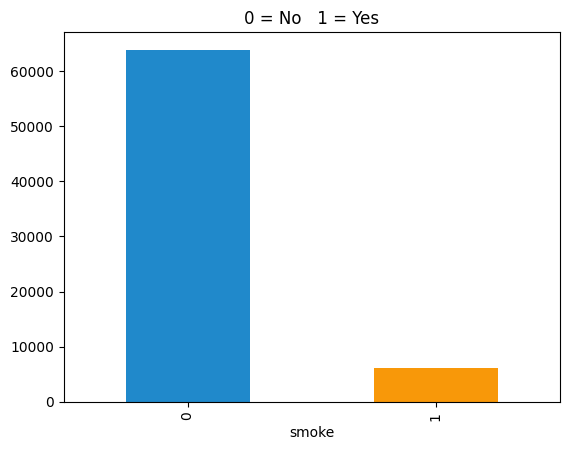

In [14]:
df['smoke'].value_counts().plot(kind="bar", color=["#2089CB","#F89809"],title = '0 = No   1 = Yes')

<Axes: title={'center': '0 = No   1 = Yes'}, xlabel='alco'>

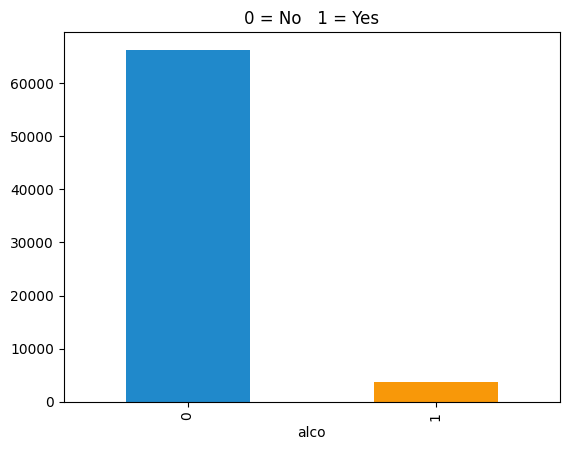

In [15]:
df['alco'].value_counts().plot(kind="bar", color=["#2089CB","#F89809"],title = '0 = No   1 = Yes')

<Axes: title={'center': '0 = No   1 = Yes'}, xlabel='active'>

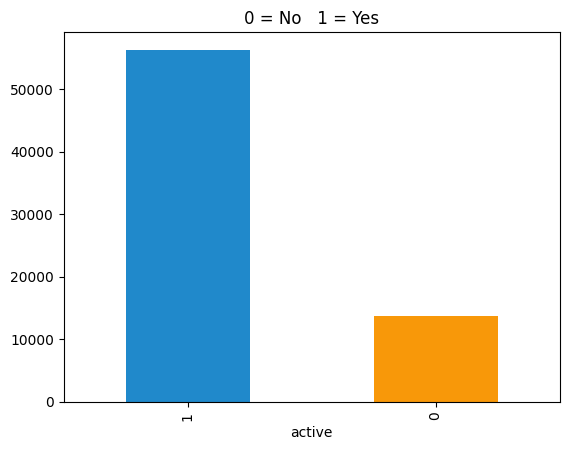

In [16]:
df['active'].value_counts().plot(kind="bar", color=["#2089CB","#F89809"],title = '0 = No   1 = Yes')

# <span style="color:#FFA500">Data Preprocessing</span>

In [17]:
df_before = df.copy()


In [18]:
print(df["gender"].unique())

[2 1]


## Next encode the Gender 0 for Female and 1 for Male and dropping the old gender column

In [19]:
df["gender"] = df["gender"].astype(int).map({1: 0, 2: 1})
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,1,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,0,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,0,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,1,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,0,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,1,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,0,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,1,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,0,163,72.0,135,80,1,2,0,0,0,1


## Generating a combined feature for lifestyle instead of seperate columns with higher attention to smoke considering it has a higher factor in risk rate according to [Here](https://pmc.ncbi.nlm.nih.gov/articles/PMC7399440/)

In [20]:
df["lifestyle_risk"] = (2 * df["smoke"]) + df["alco"] + (1 - df["active"])
df


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,lifestyle_risk
0,0,18393,1,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,0,156,85.0,140,90,3,1,0,0,1,1,0
2,2,18857,0,165,64.0,130,70,3,1,0,0,0,1,1
3,3,17623,1,169,82.0,150,100,1,1,0,0,1,1,0
4,4,17474,0,156,56.0,100,60,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,1,168,76.0,120,80,1,1,1,0,1,0,2
69996,99995,22601,0,158,126.0,140,90,2,2,0,0,1,1,0
69997,99996,19066,1,183,105.0,180,90,3,1,0,1,0,1,2
69998,99998,22431,0,163,72.0,135,80,1,2,0,0,0,1,1


## Dropping lifestyle columns

In [21]:
df.drop(["alco","active","smoke"], axis = 1 , inplace = True)
df.shape

(70000, 11)

## Splitting the blood pressure into 6 Categories

In [22]:
def categorize_bp(row):
    if row["ap_hi"] < 90 and row["ap_lo"] < 60:
        return "Hypotension"
    elif row["ap_hi"] < 120 and row["ap_lo"] < 80:
        return "Normal"
    elif (120 <= row["ap_hi"] <= 129 )and row["ap_lo"] < 80:
        return "Elevated"
    elif (130 <= row["ap_hi"] <= 139) or (80 <= row["ap_lo"] <= 89):
        return "Stage 1 Hypertension"
    elif (row["ap_hi"] >= 180) or (row["ap_lo"] >= 120):
        return "Severe Hypertension"
    elif (row["ap_hi"] >= 140) or (row["ap_lo"] >= 90):
        return "Stage 2 Hypertension"
    else:
        return "Uncategorized"

df["ap_status"] = df.apply(categorize_bp, axis=1)






<Axes: xlabel='ap_status', ylabel='count'>

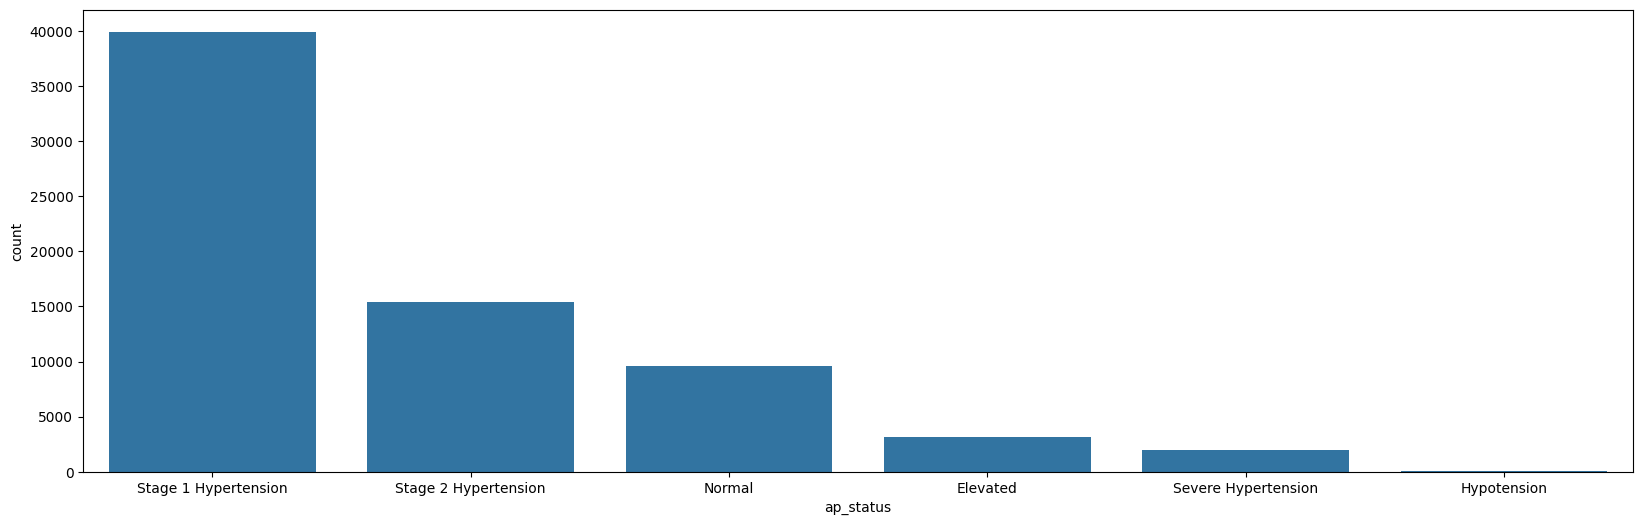

In [23]:
plt.figure(figsize=[20,6])
sns.countplot(x= 'ap_status' ,data = df)

## Counting unique Values in each category

In [24]:
df.groupby(["cardio"])["ap_status"].value_counts()

cardio  ap_status           
0       Stage 1 Hypertension    22011
        Normal                   7460
        Stage 2 Hypertension     3120
        Elevated                 2113
        Severe Hypertension       301
        Hypotension                16
1       Stage 1 Hypertension    17923
        Stage 2 Hypertension    12253
        Normal                   2127
        Severe Hypertension      1659
        Elevated                 1012
        Hypotension                 5
Name: count, dtype: int64

## Depending on model accuracy we may return the hypo tension accuracy


## Encoding ap_status 
### - 1 = Normal
### - 2 = Elevated
### - 3 = Stage 1 Hypyertension
### - 4 = Stage 2 Hypyertension
### - 5 = Severe Hypertension
### - -1 = Hypotension

In [25]:
status_mapping = {
    "Normal": 1,
    "Elevated": 2,
    "Stage 1 Hypertension": 3,
    "Stage 2 Hypertension": 4,
    "Severe Hypertension": 5,
    "Hypotension": 0
}

df["ap_status"] = df["ap_status"].map(status_mapping)

## Hypotension Category may be removed later depending on model accuracy

# Using Box Plot and Calculating IQR to visualize and find outliers For Numerical Columns



In [26]:
INPUT_FEATURES = ['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc']

## Box Plots to visualize outliers


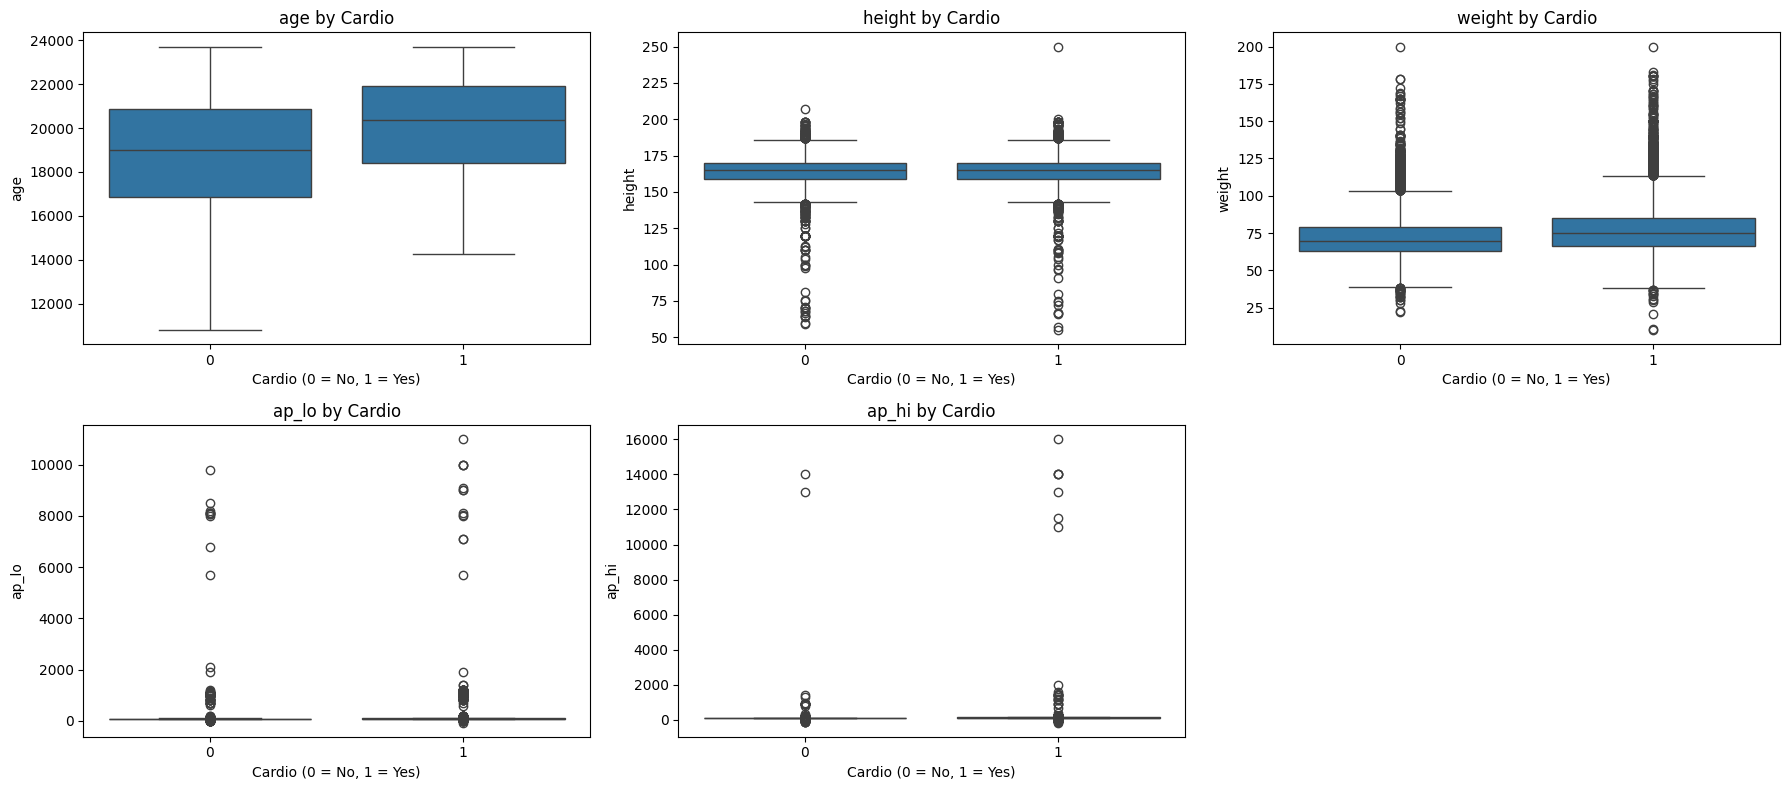

count  lower_bound  upper_bound  below_lower  above_upper  \
feature cardio                                                              
age     0       35021      10766.0      26958.0            0            0   
        1       34979      13119.0      27167.0            0            0   
height  0       35021        142.5        186.5          120          131   
        1       34979        142.5        186.5          130          138   
weight  0       35021         39.0        103.0           26          780   
        1       34979         37.5        113.5           14          704   
ap_lo   0       35021         55.0         95.0           87          974   
        1       34979         65.0        105.0          733         1414   
ap_hi   0       35021         95.0        135.0         1005         3159   
        1       34979         90.0        170.0          130          956   

                total_outliers  pct_outliers  
feature cardio                                
age     0                    0          0.00  
        1                    0          0.00  
height  0                  251          0.72  
        1                  268          0.77  
weight  0                  806          2.30  
        1                  718          2.05  
ap_lo   0                 1061          3.03  
        1                 2147          6.14  
ap_hi   0                 4164         11.89  
        1                 1086          3.10

In [27]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
features_to_plot = ['age', 'height', 'weight', 'ap_lo', 'ap_hi']

n_cols = 3
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()

summary_rows = []

for ax, feature in zip(axes,features_to_plot):
    temp_df = df[[feature, 'cardio']].dropna()

    sns.boxplot(
        data=temp_df,
        x='cardio',
        y=feature,
        ax=ax,
        whis=1.5
    )
    ax.set_title(f'{feature} by Cardio')
    ax.set_xlabel('Cardio (0 = No, 1 = Yes)')
    ax.set_ylabel(feature)

   
    for group_val in [0, 1]:
        series = temp_df.loc[temp_df['cardio'] == group_val, feature]
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        below_lower = (series < lower_bound).sum()
        above_upper = (series > upper_bound).sum()

        summary_rows.append({
            'feature': feature,
            'cardio': group_val,
            'count': len(series),
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'below_lower': below_lower,
            'above_upper': above_upper,
            'total_outliers': below_lower + above_upper,
            'pct_outliers': ((below_lower + above_upper) / len(series)) * 100 if len(series) else 0
        })

for ax in axes[len(features_to_plot):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

outlier_summary = pd.DataFrame(summary_rows).set_index(['feature', 'cardio'])
outlier_summary = outlier_summary.round({'lower_bound': 2, 'upper_bound': 2, 'pct_outliers': 2})
display(outlier_summary)


In [28]:
impute =int(outlier_summary["total_outliers"].sum())

In [29]:
def IQR(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)

    IQR = Q3 - Q1

    min_v = Q1 - 1.5 * IQR
    max_v = Q3 + 1.5 * IQR

    return series.clip(lower=min_v, upper=max_v)


In [30]:
exclude = ['gluc','alco','smoke','cholesterol','active']

for num_feature in [f for f in INPUT_FEATURES if f not in exclude]:
    for gender_category in df["cardio"].unique():
        mask = df["cardio"] == gender_category
        df.loc[mask, num_feature] = IQR(df.loc[mask, num_feature])

C:\Users\Omar Nashat\AppData\Local\Temp\ipykernel_24788\3303378238.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[168. 156. 151. ... 159. 168. 170.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[mask, num_feature] = IQR(df.loc[mask, num_feature])


C:\Users\Omar Nashat\AppData\Local\Temp\ipykernel_24788\892868318.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cardio', y=feature, data=df, ax=axes[2*i + 1], whis=1.5, palette='Set2')
C:\Users\Omar Nashat\AppData\Local\Temp\ipykernel_24788\892868318.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cardio', y=feature, data=df, ax=axes[2*i + 1], whis=1.5, palette='Set2')
C:\Users\Omar Nashat\AppData\Local\Temp\ipykernel_24788\892868318.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cardio', y=feature, data=df, ax=axe

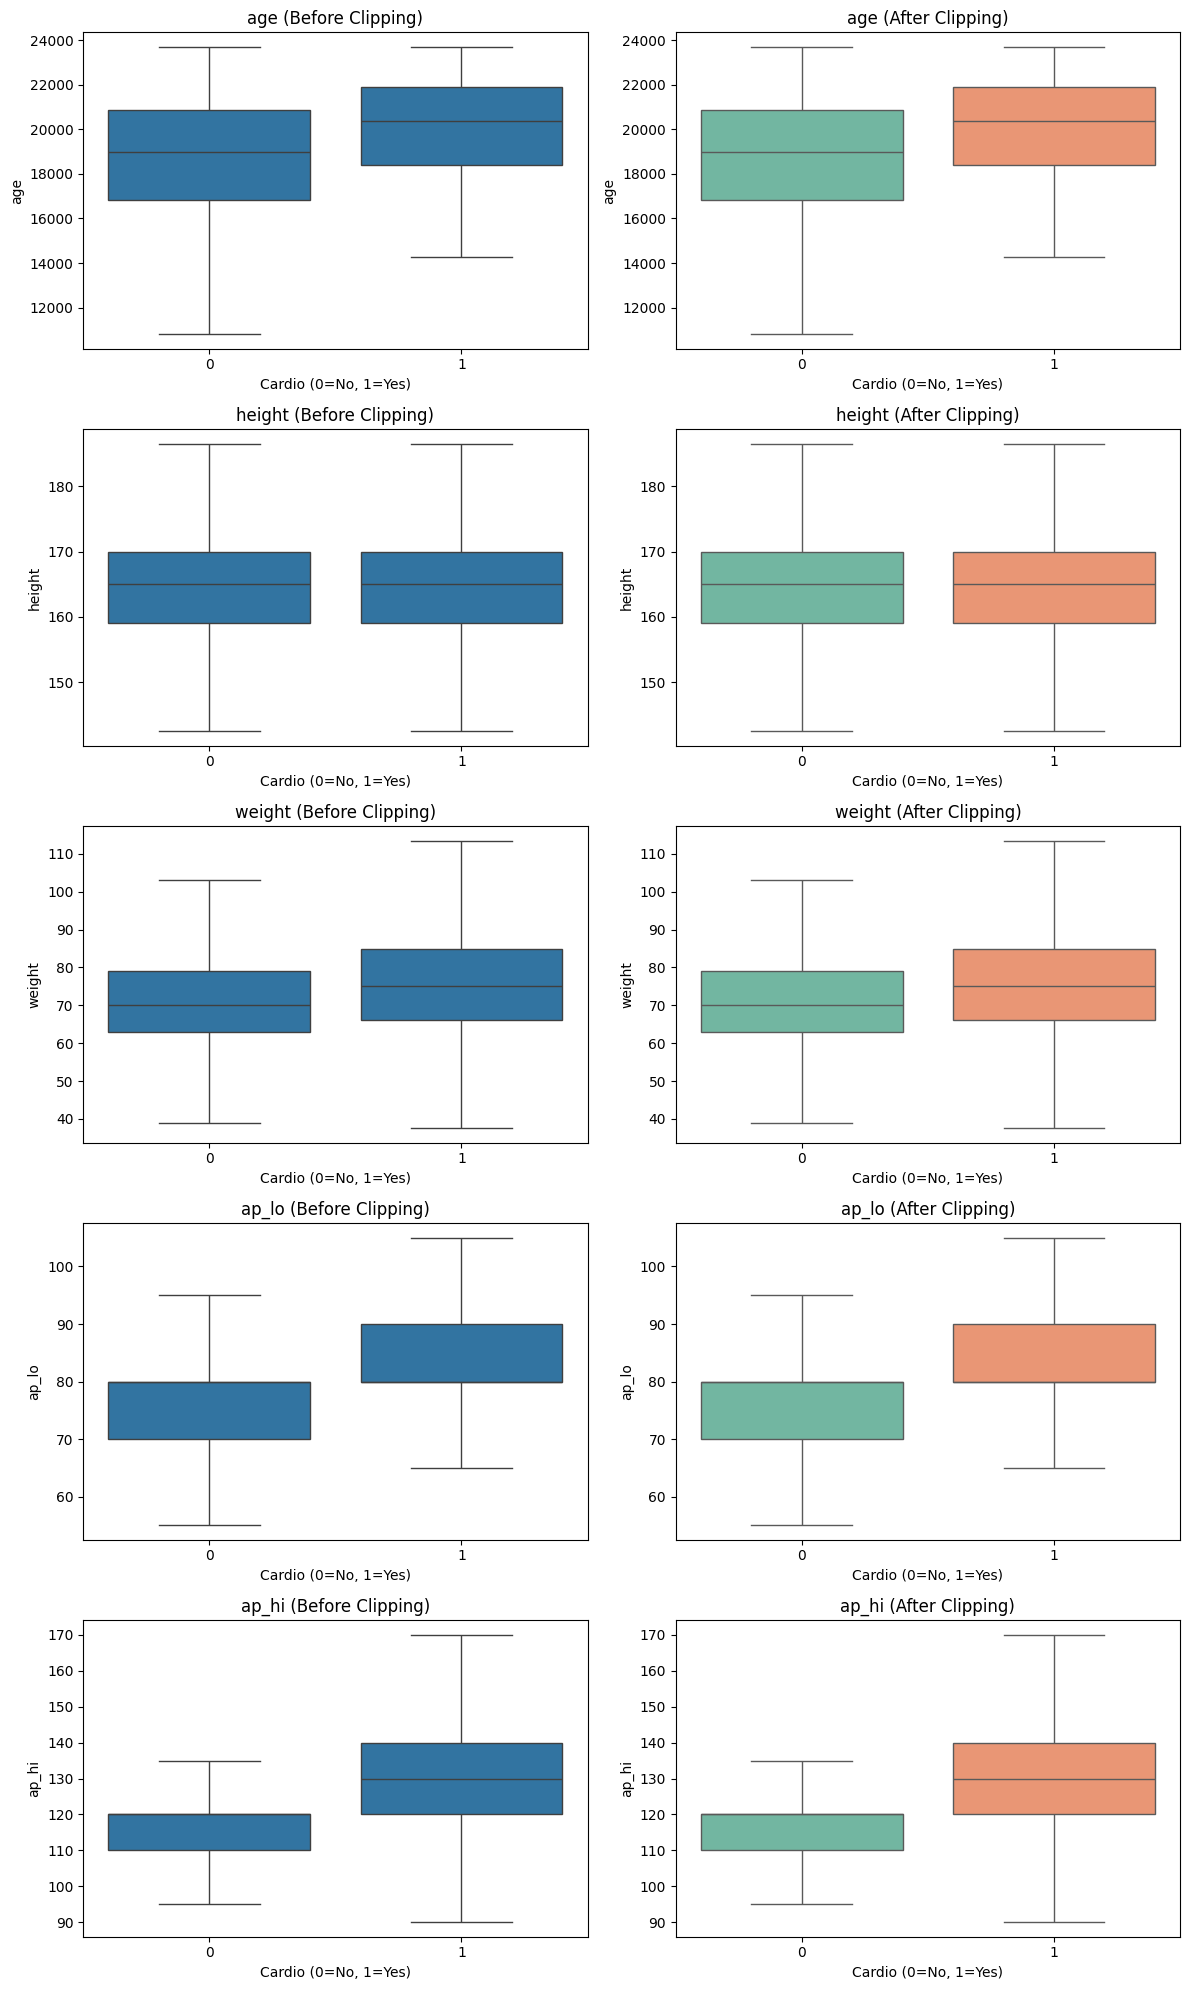

Values Imputed: 10501


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

features_to_plot = ['age', 'height', 'weight', 'ap_lo', 'ap_hi']

df_before_clip = df.copy()





n_cols = 2
n_rows = len(features_to_plot)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):

    sns.boxplot(x='cardio', y=feature, data=df_before_clip, ax=axes[2*i], whis=1.5)
    axes[2*i].set_title(f'{feature} (Before Clipping)')
    axes[2*i].set_xlabel('Cardio (0=No, 1=Yes)')
    axes[2*i].set_ylabel(feature)

    sns.boxplot(x='cardio', y=feature, data=df, ax=axes[2*i + 1], whis=1.5, palette='Set2')
    axes[2*i + 1].set_title(f'{feature} (After Clipping)')
    axes[2*i + 1].set_xlabel('Cardio (0=No, 1=Yes)')
    axes[2*i + 1].set_ylabel(feature)

plt.tight_layout()
plt.show()
print("Values Imputed:",impute)

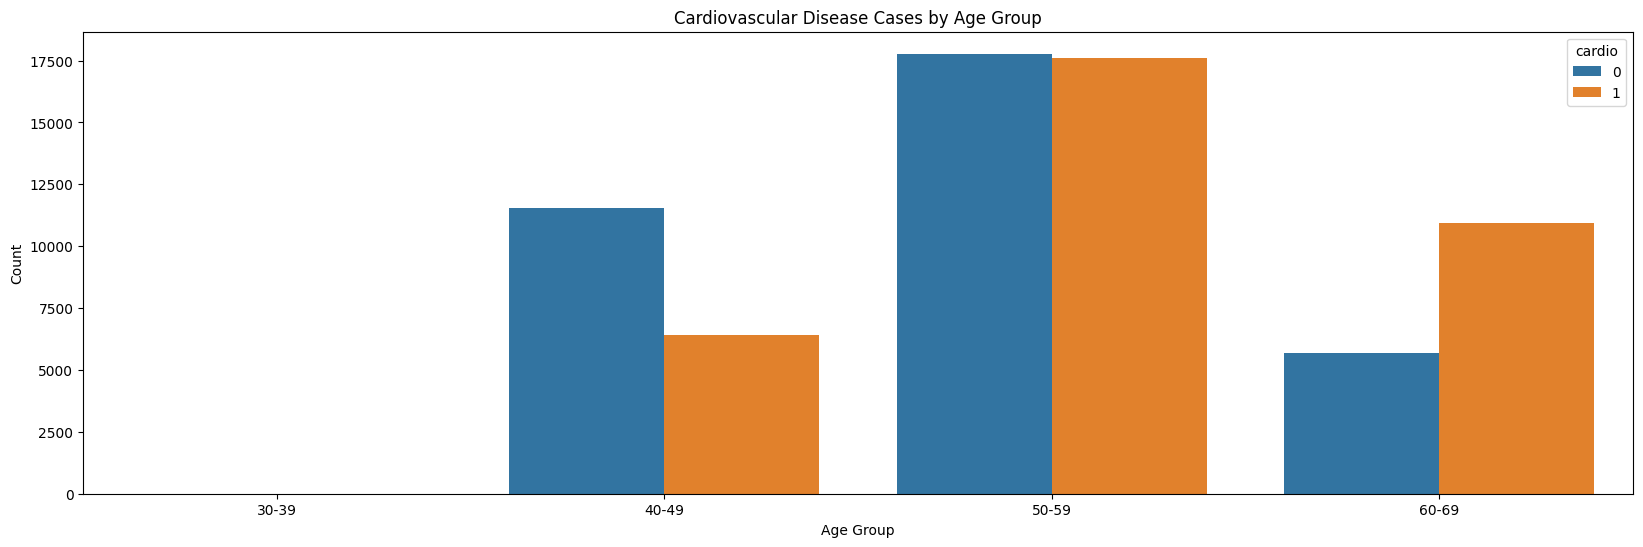

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

bins = [28, 39, 49, 59, 69]
labels = ['30-39', '40-49', '50-59', '60-69']

plt.figure(figsize=(20,6))
sns.countplot(
    x=pd.cut(df['age'] / 365, bins=bins, labels=labels), 
    hue='cardio', 
    data=df
)
plt.title("Cardiovascular Disease Cases by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

In [33]:
df.duplicated().sum()

np.int64(0)

In [34]:
df.shape

(70000, 12)

## Setting id as index

In [35]:
df = df.set_index(['id'])
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,cardio,lifestyle_risk,ap_status
id,,,,,,,,,,,
0,18393,1,168.0,62.0,110,80,1,1,0,0,3
1,20228,0,156.0,85.0,140,90,3,1,1,0,4
2,18857,0,165.0,64.0,130,70,3,1,1,1,3
3,17623,1,169.0,82.0,150,100,1,1,1,0,4
4,17474,0,156.0,56.0,100,60,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,1,168.0,76.0,120,80,1,1,0,2,3
99995,22601,0,158.0,113.5,140,90,2,2,1,0,4
99996,19066,1,183.0,105.0,170,90,3,1,1,2,5


In [36]:
df.shape

(70000, 11)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             70000 non-null  int64  
 1   gender          70000 non-null  int64  
 2   height          70000 non-null  float64
 3   weight          70000 non-null  float64
 4   ap_hi           70000 non-null  int64  
 5   ap_lo           70000 non-null  int64  
 6   cholesterol     70000 non-null  int64  
 7   gluc            70000 non-null  int64  
 8   cardio          70000 non-null  int64  
 9   lifestyle_risk  70000 non-null  int64  
 10  ap_status       70000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 6.4 MB


## Checking for duplicates after indexing id column

In [38]:
df.duplicated().sum()

np.int64(24)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             70000 non-null  int64  
 1   gender          70000 non-null  int64  
 2   height          70000 non-null  float64
 3   weight          70000 non-null  float64
 4   ap_hi           70000 non-null  int64  
 5   ap_lo           70000 non-null  int64  
 6   cholesterol     70000 non-null  int64  
 7   gluc            70000 non-null  int64  
 8   cardio          70000 non-null  int64  
 9   lifestyle_risk  70000 non-null  int64  
 10  ap_status       70000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 6.4 MB


## Checking for partial duplicates

In [40]:
partial_duplicates = df[df.duplicated(subset=['age','gender','height', 'weight','ap_hi','ap_lo','cholesterol','lifestyle_risk'])]
partial_duplicates

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,cardio,lifestyle_risk,ap_status
id,,,,,,,,,,,
15094,20495,0,165.0,70.0,120,80,1,1,0,0,3
31110,16793,0,165.0,68.0,120,80,1,1,0,0,3
35727,19073,0,165.0,56.0,120,80,1,1,0,0,3
36436,21207,0,158.0,63.0,120,80,1,1,0,0,3
54418,17739,0,168.0,70.0,140,80,2,2,1,0,3
54977,18988,0,164.0,65.0,120,80,1,1,0,0,3
57690,14552,0,158.0,64.0,120,80,1,1,0,0,3
60172,21809,0,165.0,65.0,120,80,1,1,0,0,3
60642,18353,0,169.0,67.0,120,80,1,1,0,0,3


## Dropping conflicting duplicates


In [41]:
df.drop(partial_duplicates.index,inplace = True)

## Dropping values with ap_hi lower than ap_lo (145 row)

In [42]:
df[(df["ap_hi"]) <= (df["ap_lo"])]["gender"].count()

np.int64(145)

In [43]:
df = df[(df["ap_hi"]) > (df["ap_lo"])]

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69813 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             69813 non-null  int64  
 1   gender          69813 non-null  int64  
 2   height          69813 non-null  float64
 3   weight          69813 non-null  float64
 4   ap_hi           69813 non-null  int64  
 5   ap_lo           69813 non-null  int64  
 6   cholesterol     69813 non-null  int64  
 7   gluc            69813 non-null  int64  
 8   cardio          69813 non-null  int64  
 9   lifestyle_risk  69813 non-null  int64  
 10  ap_status       69813 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 6.4 MB


## Generate BMI column

In [45]:
df['BMI'] = df['weight'] / ((df['height']/100) ** 2)
df

C:\Users\Omar Nashat\AppData\Local\Temp\ipykernel_24788\3203992099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI'] = df['weight'] / ((df['height']/100) ** 2)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,cardio,lifestyle_risk,ap_status,BMI
id,,,,,,,,,,,,
0,18393,1,168.0,62.0,110,80,1,1,0,0,3,21.967120
1,20228,0,156.0,85.0,140,90,3,1,1,0,4,34.927679
2,18857,0,165.0,64.0,130,70,3,1,1,1,3,23.507805
3,17623,1,169.0,82.0,150,100,1,1,1,0,4,28.710479
4,17474,0,156.0,56.0,100,60,1,1,0,1,1,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,1,168.0,76.0,120,80,1,1,0,2,3,26.927438
99995,22601,0,158.0,113.5,140,90,2,2,1,0,4,45.465470
99996,19066,1,183.0,105.0,170,90,3,1,1,2,5,31.353579


# Generating Pulse Pressure

In [46]:
df["pulse_pressure"] = df["ap_hi"]-df["ap_lo"]

C:\Users\Omar Nashat\AppData\Local\Temp\ipykernel_24788\3307499548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["pulse_pressure"] = df["ap_hi"]-df["ap_lo"]


## Generate BMI categories

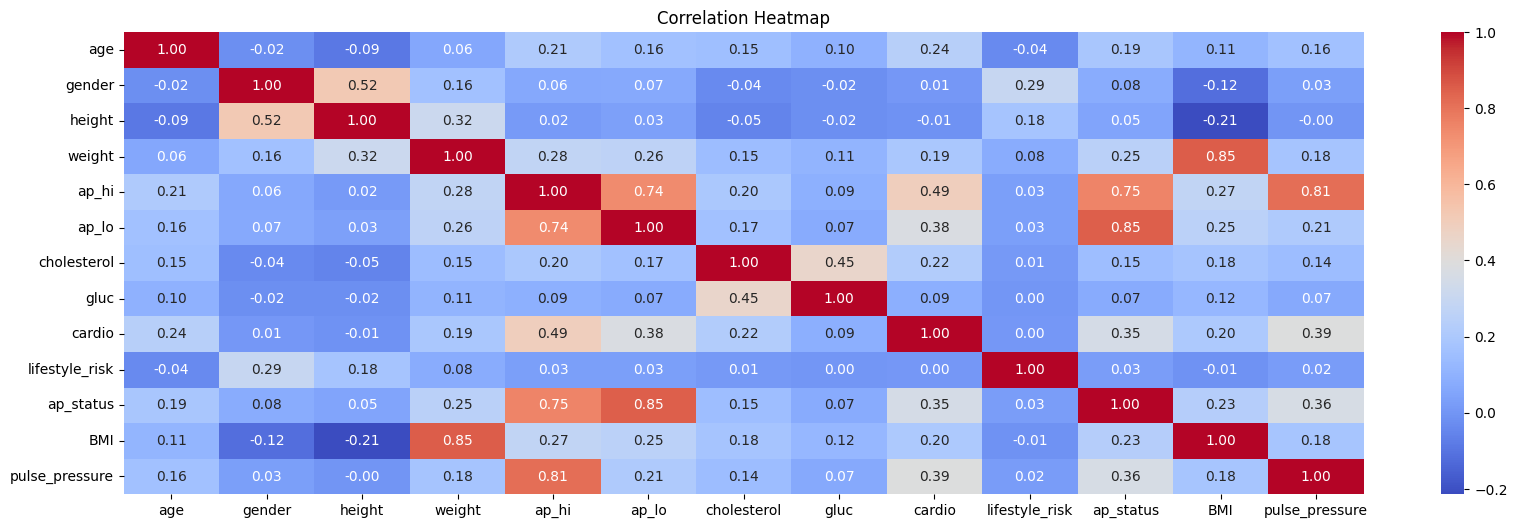

In [47]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(20,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [48]:
columns = ['age',"BMI",'ap_hi','ap_lo']
for col in columns:
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]
    print(f"{col} - Mean: {mean:.2f}, Median: {median}, Mode: {mode}")

age - Mean: 19468.59, Median: 19703.0, Mode: 18236
BMI - Mean: 27.40, Median: 26.370238143535232, Mode: 23.875114784205696
ap_hi - Mean: 126.31, Median: 120.0, Mode: 120
ap_lo - Mean: 81.49, Median: 80.0, Mode: 80


## Standardization ensures that:
    - All numeric features have mean = 0 and std = 1.
    - Large-scale features (like age in days or systolic BP) donâ€™t dominate smaller ones (like BMI).
- ### We apply standardization (zero mean, unit variance) to numeric features (age_years, height, weight, ap_hi, ap_lo, bmi). StandardScaler from scikit-learn is used, which is common for ML preprocessing.

In [49]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

sd_scaler = StandardScaler()
num_cols = ['age', 'BMI', 'ap_hi', 'ap_lo']
sd_df = df.copy()
sd_df[num_cols] = sd_scaler.fit_transform(df[num_cols])

In [50]:
sd_df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,cardio,lifestyle_risk,ap_status,BMI,pulse_pressure
count,6.981300e+04,69813.000000,69813.000000,69813.000000,6.981300e+04,6.981300e+04,69813.000000,69813.000000,69813.000000,69813.000000,69813.000000,6.981300e+04,69813.000000
mean,1.848288e-16,0.349548,164.406765,73.962122,-2.428423e-16,-2.383641e-16,1.366995,1.226333,0.499334,0.426153,2.952745,-1.424892e-16,44.812585
std,1.000007e+00,0.476831,7.825718,13.565401,1.000007e+00,1.000007e+00,0.680307,0.572067,0.500003,0.775182,0.959779,1.000007e+00,10.719598
min,-3.513750e+00,0.000000,142.500000,37.500000,-2.337096e+00,-2.874723e+00,1.000000,1.000000,0.000000,0.000000,0.000000,-3.123735e+00,5.000000
25%,-7.317146e-01,0.000000,159.000000,65.000000,-4.059006e-01,-1.619877e-01,1.000000,1.000000,0.000000,0.000000,3.000000,-7.077205e-01,40.000000
50%,9.499376e-02,0.000000,165.000000,72.000000,-4.059006e-01,-1.619877e-01,1.000000,1.000000,0.000000,0.000000,3.000000,-2.070136e-01,40.000000
75%,7.531185e-01,1.000000,170.000000,82.000000,5.596972e-01,9.231062e-01,2.000000,1.000000,1.000000,1.000000,3.000000,5.455636e-01,50.000000
max,1.720043e+00,1.000000,186.500000,113.500000,2.812759e+00,2.550747e+00,3.000000,3.000000,1.000000,4.000000,5.000000,5.717669e+00,105.000000


In [51]:
sd_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,cardio,lifestyle_risk,ap_status,BMI,pulse_pressure
id,,,,,,,,,,,,,
0,-0.435883,1,168.0,62.0,-1.049632,-0.161988,1,1,0,0,3,-1.090606,30
1,0.307750,0,156.0,85.0,0.881563,0.923106,3,1,1,0,4,1.510244,50
2,-0.247847,0,165.0,64.0,0.237831,-1.247082,3,1,1,1,3,-0.781430,60
3,-0.747925,1,169.0,82.0,1.525295,2.008200,1,1,1,0,4,0.262612,50
4,-0.808307,0,156.0,56.0,-1.693364,-2.332176,1,1,0,1,1,-0.881091,40


## Finally, we save the cleaned dataset to CSV:

In [53]:
df.to_csv('cardio_cleaned.csv', index=False)
sd_df.to_csv('cardio_cleaned_sd.csv', index=False)

In [ ]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,cardio,lifestyle_risk,ap_status,BMI,pulse_pressure
count,69807.000000,69807.000000,69807.000000,69807.000000,69807.000000,69807.000000,69807.00000,69807.000000,69807.000000,69807.000000,69807.000000,69807.000000,69807.000000
mean,19468.546980,0.349549,164.406886,73.962592,126.305972,81.492973,1.25847,1.226324,0.499363,0.426175,2.952741,27.401961,44.812999
std,2467.716483,0.476831,7.825947,13.565865,15.535087,9.216244,0.60664,0.572049,0.500003,0.775204,0.959820,4.983395,10.719966
min,10798.000000,0.000000,142.500000,37.500000,90.000000,55.000000,1.00000,1.000000,0.000000,0.000000,0.000000,11.835627,5.000000
25%,17663.000000,0.000000,159.000000,65.000000,120.000000,80.000000,1.00000,1.000000,0.000000,0.000000,3.000000,23.875115,40.000000
50%,19703.000000,0.000000,165.000000,72.000000,120.000000,80.000000,1.00000,1.000000,0.000000,0.000000,3.000000,26.370238,40.000000
75%,21327.000000,1.000000,170.000000,82.000000,135.000000,90.000000,1.00000,1.000000,1.000000,1.000000,3.000000,30.120482,50.000000
max,23713.000000,1.000000,186.500000,113.500000,170.000000,105.000000,3.00000,3.000000,1.000000,4.000000,5.000000,55.894121,105.000000
